In [2]:
from typing import Dict, TypedDict
from langgraph.graph import StateGraph

In [3]:
class AgentState(TypedDict):
    name:str
    age:int
    final:str

def first_node(state:AgentState) -> AgentState:
    '''This is the first node'''
    state['final'] = f"Hello {state['name']}"
    return state

def second_node(state:AgentState) -> AgentState:
    '''This is the second node'''
    state['final'] = f"{state['final']} Your age is {state['age']}"
    return state

graph = StateGraph(AgentState)
graph.add_node('namer', first_node)
graph.add_node('ager', second_node)

graph.add_edge('namer', 'ager')
graph.set_entry_point('namer')
graph.set_finish_point('ager')

app = graph.compile()


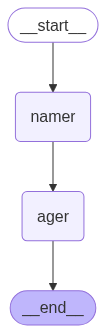

In [6]:
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))

In [7]:
result = app.invoke({"name": "Magi", 'age': 35})
print(result)

{'name': 'Magi', 'age': 35, 'final': 'Hello Magi Your age is 35'}
